In [64]:
import os
import os.path as op
import nibabel as nib
import numpy as np
import csv
import s
from sklearn.metrics import f1_score
from scipy.spatial.distance import dice
from nilearn import maskers

In [65]:
deriv_dir = "./derivatives"
output_dir = "./derivatives/f1"
if not op.exists(output_dir):
    os.makedirs(output_dir)


In [131]:
hcp_mask = op.join(deriv_dir, "hcp_ave_hbmask.nii.gz")
hcp_nii_image = nib.load(hcp_mask)
hcp_nii_data = hcp_nii_image.get_fdata()
print(hcp_nii_data)

# Print the shape of the data for reference
print("Shape of the NIfTI data:", hcp_nii_data.shape)

# Find the indices where the value is 1
indices_where_notzero = np.argwhere(hcp_nii_data > 0)

# Print the indices
print("Indices where the value is not 0:")
print(indices_where_notzero)

# Get the non-zero values
nonzero_values = hcp_nii_data[hcp_nii_data > 0]

# Print the non-zero values
print("Non-zero values before modification:")
print(nonzero_values)

# make binary
# Apply a threshold to binarize the HCP data
hcp_nii_data = np.where(hcp_nii_data > 0.2, 1, 0)

# Print the modified array to verify the changes
print("Modified NIfTI data (values > 0.1 set to 1, others set to 0):")
print(hcp_nii_data)

indices_where_one = np.argwhere(hcp_nii_data == 1)

# Print the indices
print("Indices where the value is 1:")
print(indices_where_one)


# Get the non-zero values
nonzero_values = hcp_nii_data[hcp_nii_data > 0]

# Print the non-zero values
print("Non-zero values before modification:")
print(nonzero_values)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
Shape of t

In [132]:
# Prepare the CSV file to store the results
csv_file_path = op.join(output_dir, "f1_scores.csv")

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "F1 Score"])
    for i in range(1, 35):
        subject = f"HIP{i:03}"
        subject_path = op.join(deriv_dir, subject)

        if op.isdir(subject_path):
            file_to_check = f"{subject}_hbmask.nii.gz"  # Replace with your actual filename
            file_path = op.join(subject_path, file_to_check)

            if op.isfile(file_path):
                aub_nii_image = nib.load(file_path)
                aub_nii_data = aub_nii_image.get_fdata()
                # print(aub_nii_data)
                # nii_arrays.append(nii_data)

                # Print the shape of the data for reference
                # print(aub_nii_data)
                # print("Shape of the NIfTI data:", aub_nii_data.shape)

                # Find the indices where the value is 1
                indices_where_one = np.argwhere(aub_nii_data == 1)

                # Print the indices
                # print("Indices where the value is 1:")
                # print(indices_where_one)

                # Ensure both arrays have the same shape
                if hcp_nii_data.shape == aub_nii_data.shape:
                    # Flatten the arrays for F1 score calculation
                    hcp_flat = hcp_nii_data.flatten()
                    aub_flat = aub_nii_data.flatten()

                    # Calculate the F1 score
                    f1 = f1_score(
                        hcp_flat, aub_flat, average="binary", zero_division="warn"
                    )
                    print(f"F1 Score: {f1}")

                    # Print the shape of the data for reference
                    #print("Shape of the NIfTI data:", aub_nii_data.shape)

                    # Find the indices where the value is 1 in aub_nii_data
                    indices_where_one = np.argwhere(aub_nii_data == 1)

                    # Print the indices
                    #print("Indices where the value is 1 in aub_nii_data:")
                    #print(indices_where_one)
                    csv_writer.writerow([subject, f1])
                else:
                    print(
                        f"{subject} hape mismatch: HCP shape {hcp_nii_data.shape}, AUB shape {aub_nii_data.shape}"
                    )

            else:
                print(f"File not found in: {subject_path}")
        else:
            print(f"Directory not found: {subject_path}")

F1 Score: 0.3050847457627119
F1 Score: 0.0
F1 Score: 0.25
F1 Score: 0.0
F1 Score: 0.0
F1 Score: 0.08888888888888888
F1 Score: 0.0
F1 Score: 0.0
F1 Score: 0.1111111111111111
File not found in: /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/HIP010
F1 Score: 0.56
File not found in: /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/HIP012
F1 Score: 0.5357142857142857
F1 Score: 0.6666666666666666
F1 Score: 0.3846153846153846
F1 Score: 0.28070175438596495
F1 Score: 0.04166666666666667
F1 Score: 0.7
File not found in: /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/HIP019
HIP020 hape mismatch: HCP shape (91, 109, 91), AUB shape (182, 218, 182)
F1 Score: 0.5263157894736842
F1 Score: 0.3508771929824561
F1 Score: 0.5106382978723405
F1 Score: 0.4
F1 Score: 0.5517241379310344
F1 Score: 0.30188679245283023
F1 Score: 0.10714285714285714
File not found in: /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/HIP028
File not found in: /Users/chloehampson/Desktop/nbc/hb-analys

In [136]:
from scipy.spatial.distance import dice

# Prepare the CSV file to store the results
csv_file_path = op.join(output_dir, "dsc_scorestest.csv")

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "DSC Score"])
    for i in range(1, 35):
        subject = f"HIP{i:03}"
        subject_path = op.join(deriv_dir, subject)

        if op.isdir(subject_path):
            file_to_check = (
                f"{subject}_hbmask.nii.gz"  # Replace with your actual filename
            )
            file_path = op.join(subject_path, file_to_check)

            if op.isfile(file_path):
                aub_nii_image = nib.load(file_path)
                aub_nii_data = aub_nii_image.get_fdata()
                # print(aub_nii_data)
                # nii_arrays.append(nii_data)

                # Print the shape of the data for reference
                # print(aub_nii_data)
                # print("Shape of the NIfTI data:", aub_nii_data.shape)

                # Find the indices where the value is 1
                indices_where_one = np.argwhere(aub_nii_data == 1)

                # Print the indices
                # print("Indices where the value is 1:")
                # print(indices_where_one)

                # Ensure both arrays have the same shape
                if hcp_nii_data.shape == aub_nii_data.shape:
                    # Flatten the arrays for F1 score calculation
                    hcp_flat = hcp_nii_data.flatten()
                    aub_flat = aub_nii_data.flatten()

                    # Calculate the dsc score
                    ddc = float(dice(hcp_flat, aub_flat))

                    dsc = 1 - ddc
                    print(f"dsc Score: {dsc}")

                    # Print the shape of the data for reference
                    # print("Shape of the NIfTI data:", aub_nii_data.shape)

                    # Find the indices where the value is 1 in aub_nii_data
                    indices_where_one = np.argwhere(aub_nii_data == 1)

                    # Print the indices
                    # print("Indices where the value is 1 in aub_nii_data:")
                    # print(indices_where_one)
                    print(f"Subject: {subject}, DSC: {dsc}")

                    # Write the results to the CSV file
                    csv_writer.writerow([subject, dsc])
                else:
                    print(
                        f"{subject} hape mismatch: HCP shape {hcp_nii_data.shape}, AUB shape {aub_nii_data.shape}"
                    )

            else:
                print(f"File not found in: {subject_path}")
        else:
            print(f"Directory not found: {subject_path}")

dsc Score: 0.30508474576271183
Subject: HIP001, DSC: 0.30508474576271183
dsc Score: 0.0
Subject: HIP002, DSC: 0.0
dsc Score: 0.25
Subject: HIP003, DSC: 0.25
dsc Score: 0.0
Subject: HIP004, DSC: 0.0
dsc Score: 0.0
Subject: HIP005, DSC: 0.0
dsc Score: 0.0888888888888889
Subject: HIP006, DSC: 0.0888888888888889
dsc Score: 0.0
Subject: HIP007, DSC: 0.0
dsc Score: 0.0
Subject: HIP008, DSC: 0.0
dsc Score: 0.11111111111111116
Subject: HIP009, DSC: 0.11111111111111116
File not found in: /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/HIP010
dsc Score: 0.56
Subject: HIP011, DSC: 0.56
File not found in: /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/HIP012
dsc Score: 0.5357142857142857
Subject: HIP013, DSC: 0.5357142857142857
dsc Score: 0.6666666666666667
Subject: HIP014, DSC: 0.6666666666666667
dsc Score: 0.3846153846153846
Subject: HIP015, DSC: 0.3846153846153846
dsc Score: 0.2807017543859649
Subject: HIP016, DSC: 0.2807017543859649
dsc Score: 0.04166666666666663
Subject: HIP0

In [141]:
import scipy
# Prepare the CSV file to store the results
csv_file_path = op.join(output_dir, "icc_scores.csv")

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "Pearson Score"])
    for i in range(1, 35):
        subject = f"HIP{i:03}"
        subject_path = op.join(deriv_dir, subject)

        if op.isdir(subject_path):
            file_to_check = (
                f"{subject}_hbmask.nii.gz"  # Replace with your actual filename
            )
            file_path = op.join(subject_path, file_to_check)

            if op.isfile(file_path):
                aub_nii_image = nib.load(file_path)
                aub_nii_data = aub_nii_image.get_fdata()
                # print(aub_nii_data)
                # nii_arrays.append(nii_data)

                # Print the shape of the data for reference
                # print(aub_nii_data)
                # print("Shape of the NIfTI data:", aub_nii_data.shape)

                # Find the indices where the value is 1
                indices_where_one = np.argwhere(aub_nii_data == 1)

                # Print the indices
                # print("Indices where the value is 1:")
                # print(indices_where_one)

                # Ensure both arrays have the same shape
                if hcp_nii_data.shape == aub_nii_data.shape:
                    # Flatten the arrays for F1 score calculation
                    hcp_flat = hcp_nii_data.flatten()
                    aub_flat = aub_nii_data.flatten()

                    # Calculate the dsc score
                    p = scipy.stats.pearsonr(hcp_flat, aub_flat)

                    print(f"Subject: {subject}, Pearson: {p}")

                    # Write the results to the CSV file
                    csv_writer.writerow([subject, p])
                else:
                    print(
                        f"{subject} hape mismatch: HCP shape {hcp_nii_data.shape}, AUB shape {aub_nii_data.shape}"
                    )

            else:
                print(f"File not found in: {subject_path}")
        else:
            print(f"Directory not found: {subject_path}")

Subject: HIP001, Pearson: PearsonRResult(statistic=0.30510587058611816, pvalue=0.0)
Subject: HIP002, Pearson: PearsonRResult(statistic=-3.432742679468632e-05, pvalue=0.9739829310158155)
Subject: HIP003, Pearson: PearsonRResult(statistic=0.25046321316740705, pvalue=0.0)
Subject: HIP004, Pearson: PearsonRResult(statistic=-2.910234690559481e-05, pvalue=0.9779419669604734)
Subject: HIP005, Pearson: PearsonRResult(statistic=-3.0341327679797657e-05, pvalue=0.9770031401199081)
Subject: HIP006, Pearson: PearsonRResult(statistic=0.09425975221558366, pvalue=0.0)
Subject: HIP007, Pearson: PearsonRResult(statistic=-2.5019988890518133e-05, pvalue=0.9810355471944621)
Subject: HIP008, Pearson: PearsonRResult(statistic=-2.645086831873515e-05, pvalue=0.9799512026645867)
Subject: HIP009, Pearson: PearsonRResult(statistic=0.12398856044235947, pvalue=0.0)
File not found in: /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/HIP010
Subject: HIP011, Pearson: PearsonRResult(statistic=0.5715362991426975,

In [84]:
# dsc
# Prepare the CSV file to store the results
csv_file_path = op.join(output_dir, "dsc_scores.csv")

with open(csv_file_path, mode="w", newline="") as csv_file:
    csv_writer = csv.writer(csv_file)
    # Write the header
    csv_writer.writerow(["Subject", "Intersection", "Union", "DSC Score"])
    for i in range(1, 35):
        subject = f"HIP{i:03}"
        subject_path = op.join(deriv_dir, subject)

        if op.isdir(subject_path):
            file_to_check = (
                f"overlap_results.txt"  
            )
            file_path = op.join(subject_path, file_to_check)

            if op.isfile(file_path):
                with open(file_path, "r") as infile:
                    # Read all lines in the file
                    lines = infile.readlines()

                # Check if there are at least three rows
                if len(lines) >= 3:
                    third_row_data = lines[2].strip()
                    print(third_row_data)

                    columns = third_row_data.split()

                    union = float(columns[2])
                    intersection = float(columns[3])

                    if union > 0:  # Avoid division by zero
                        j = intersection / union
                        dsc = 2 * j / (1 + j)
                    else:
                        dsc = 0  # Handle case where union is zero

                    print(f"Subject: {subject}, Intersection: {intersection}, Union: {union}, DSC: {dsc}")

                    # Write the results to the CSV file
                    csv_writer.writerow([subject, intersection, union, dsc])
                else:
                    print("The file does not contain at least three rows.") 

            else:
                print(f"File not found in: {subject_path}")
        else:
            print(f"Directory not found: {subject_path}")

29           294          297          26           3            268          10.3448     91.1565     0.9615     8.2996     6.4852
Subject: HIP001, Intersection: 26.0, Union: 297.0, DSC: 0.1609907120743034
32           294          316          10           22           284          68.7500     96.5986     0.7307     8.3336     5.2547
Subject: HIP002, Intersection: 10.0, Union: 316.0, DSC: 0.06134969325153375
34           294          295          33           1            261           2.9412     88.7755     1.6910     7.5701     6.4655
Subject: HIP003, Intersection: 33.0, Union: 295.0, DSC: 0.20121951219512194
23           294          308          9            14           285          60.8696     96.9388     1.0196     7.1159    10.9277
Subject: HIP004, Intersection: 9.0, Union: 308.0, DSC: 0.05678233438485804
25           294          306          13           12           281          48.0000     95.5782     1.1797     9.6346    10.1073
Subject: HIP005, Intersection: 13.0, Union:

In [138]:
import pandas as pd
# Paths to the CSV files
dsc_csv_path = op.join(output_dir, "dsc_scores.csv")
f1_csv_path = op.join(
    output_dir, "f1_scores.csv"
)  # Assuming this is the file with F1 scores

# Read the DSC and F1 CSV files into pandas DataFrames
dsc_df = pd.read_csv(dsc_csv_path)
f1_df = pd.read_csv(f1_csv_path)

# Merge the DataFrames on the "Subject" column
combined_df = pd.merge(dsc_df, f1_df, on="Subject", how="outer")


print(combined_df)

   Subject  Intersection  Union  DSC Score  F1 Score
0   HIP001          26.0  297.0   0.160991  0.305085
1   HIP002          10.0  316.0   0.061350  0.000000
2   HIP003          33.0  295.0   0.201220  0.250000
3   HIP004           9.0  308.0   0.056782  0.000000
4   HIP005          13.0  306.0   0.081505  0.000000
5   HIP006          14.0  295.0   0.090615  0.088889
6   HIP007           0.0  311.0   0.000000  0.000000
7   HIP008           0.0  313.0   0.000000  0.000000
8   HIP009          48.0  324.0   0.258065  0.111111
9   HIP011          20.0  294.0   0.127389  0.560000
10  HIP013          26.0  294.0   0.162500  0.535714
11  HIP014          30.0  294.0   0.185185  0.666667
12  HIP015          22.0  294.0   0.139241  0.384615
13  HIP016          27.0  294.0   0.168224  0.280702
14  HIP017          13.0  299.0   0.083333  0.041667
15  HIP018          30.0  294.0   0.185185  0.700000
16  HIP021          27.0  294.0   0.168224  0.526316
17  HIP022          24.0  297.0   0.149533  0.

   Subject  Intersection  Union  DSC Score  F1 Score
0   HIP001          26.0  297.0   0.160991  0.305085
1   HIP002          10.0  316.0   0.061350  0.000000
2   HIP003          33.0  295.0   0.201220  0.250000
3   HIP004           9.0  308.0   0.056782  0.000000
4   HIP005          13.0  306.0   0.081505  0.000000
5   HIP006          14.0  295.0   0.090615  0.088889
6   HIP007           0.0  311.0   0.000000  0.000000
7   HIP008           0.0  313.0   0.000000  0.000000
8   HIP009          48.0  324.0   0.258065  0.111111
9   HIP011          20.0  294.0   0.127389  0.560000
10  HIP013          26.0  294.0   0.162500  0.535714
11  HIP014          30.0  294.0   0.185185  0.666667
12  HIP015          22.0  294.0   0.139241  0.384615
13  HIP016          27.0  294.0   0.168224  0.280702
14  HIP017          13.0  299.0   0.083333  0.041667
15  HIP018          30.0  294.0   0.185185  0.700000
16  HIP021          27.0  294.0   0.168224  0.526316
17  HIP022          24.0  297.0   0.149533  0.

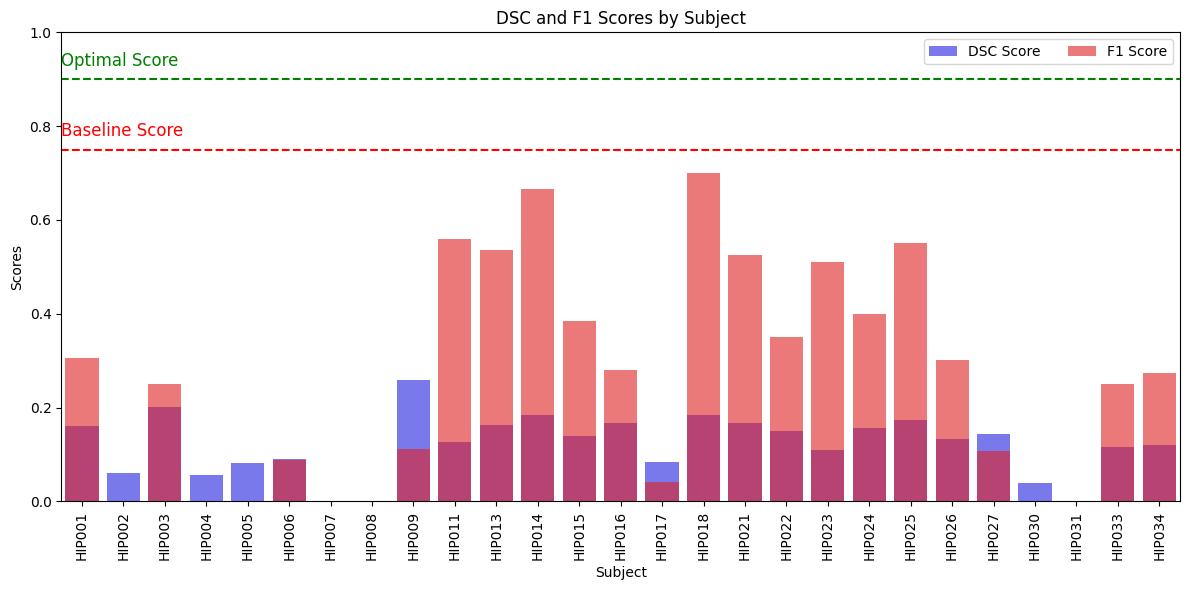

Plot saved to /Users/chloehampson/Desktop/nbc/hb-analysis/derivatives/f1/scores_comparison.png


<Figure size 640x480 with 0 Axes>

In [1]:
import os.path as op
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directories
deriv_dir = "/Users/chloehampson/Desktop/nbc/hb-analysis/derivatives"
output_dir = op.join(deriv_dir, "f1")

# Paths to the CSV files
dsc_csv_path = op.join(output_dir, "dsc_scores.csv")
f1_csv_path = op.join(output_dir, "f1_scores.csv")

# Read the DSC and F1 CSV files into pandas DataFrames
dsc_df = pd.read_csv(dsc_csv_path)
f1_df = pd.read_csv(f1_csv_path)

# Merge the DataFrames on the "Subject" column using an outer join
combined_df = pd.merge(dsc_df, f1_df, on="Subject", how="outer")

# Print the combined DataFrame to ensure it is correct
print(combined_df)

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot the DSC scores
sns.barplot(
    x="Subject",
    y="DSC Score",
    data=combined_df,
    label="DSC Score",
    color="b",
    alpha=0.6,
)

# Plot the F1 scores
sns.barplot(
    x="Subject", y="F1 Score", data=combined_df, label="F1 Score", color="r", alpha=0.6
)

# Add a legend and informative axis labels
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.ylabel("Scores")
plt.xlabel("Subject")
plt.title("DSC and F1 Scores by Subject")

# Set y-axis limits
plt.ylim(0, 1)

# Add horizontal lines at y = 0.75 and y = 0.9 with labels
plt.axhline(y=0.75, color="red", linestyle="--")
plt.text(-0.5, 0.77, "Baseline Score", color="red", fontsize=12, va="bottom")
plt.axhline(y=0.9, color="green", linestyle="--")
plt.text(-0.5, 0.92, "Optimal Score", color="green", fontsize=12, va="bottom")

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot if needed
plot_path = op.join(output_dir, "scores_comparison.png")
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")